<a href="https://colab.research.google.com/github/PassionateAbdullah/Pytorch/blob/main/MINST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch #core Pytorch library,provides fundamental structure for tensors
import torch.nn as nn #Provides ready-to-use layers like Conv2d, Linear, ReLU, MaxPool2d, etc.,
import torch.nn.functional as F #Provides functions for activation, loss, and other computations
from torch.utils.data import DataLoader #DataLoader helps split the dataset into batches, shuffle data for randomness, and supports parallel data loading
from torchvision import datasets, transforms #dataset(Provides easy access to popular datasets like MNIST, CIFAR-10, etc.) and transform(Applies preprocessing to your data.)
from torchvision.utils import make_grid #Combines multiple images into a single grid for visualization.

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools #Helps with iterative operations, such as generating grid combinations for plotting a confusion matrix.
from datetime import datetime #Tracks the start and end time of your training/testing processes.Useful for logging and measuring execution time.
import time
import matplotlib.pyplot as plt

In [ ]:
#Convert the image files into 4 dimentional (n of image, height, width , color)
transform= transforms.ToTensor()

In [ ]:
#Train data
train_data= datasets.MNIST(
    root='CNN_data',
    train=True,
    download=True,
    transform=transform
    )

test_data= datasets.MNIST(
    root='CNN_data',
    train=False,
    download=True,
    transform=transform
    )


In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: CNN_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
#create a small batch size for images...let say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [ ]:
# Model Class
class convolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1) # Changed nn.Conv2 to nn.Conv2d
    #Fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2) #2*2 kernal and 2 stride
    #Second pass
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2) #2*2 kernal and 2 stride

    #re-view to flatten it out
    x = x.view(-1,5*5*16) #negative 1 cause we can vary the batch size

    #Fully connected layers
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x,dim=1)

In [ ]:
#Create an Instance for our model
torch.manual_seed(101)
model = convolutionalNetwork()
model

convolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
#loss function optimizer
criterion= nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)


In [ ]:
import time
start_time = time.time()

#create things to track anything
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#For loop of epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0
  #Train
  for  b,(x_train,y_train) in enumerate(train_loader):
    b+=1 #start our batches at one
    y_pred = model(x_train) #get predicted values from training set. Not flattened 2D
    loss = criterion(y_pred,y_train) #how off are we? compare prediction to the y_train
    predicted = torch.max(y_pred.data,1)[1] #add up the number to the correct prediction,Indexed on the first point
    batch_corr = (predicted == y_train).sum() #how many correct we got from the batch if we got 0=false and 1 =true,sum those up
    trn_corr += batch_corr #keep track as we go along training

    #update our parameter
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Print out some results
    if b%600==0:
      print(f'epoch: {i}  batch: {b}  loss: {loss.item()}')
  train_losses.append(loss)
  train_correct.append(trn_corr)


  #Test
  with torch.no_grad(): #no gradient so we dont update our bias and weight with test data
    for b,(x_test,y_test) in enumerate(test_loader):
      y_val = model(x_test)
      predicted = torch.max(y_val.data,1)[1] #adding up correct prediction
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f'Training Took : {total/60} minutes!')

epoch: 0  batch: 600  loss: 0.27714279294013977
epoch: 0  batch: 1200  loss: 0.05869954079389572
epoch: 0  batch: 1800  loss: 0.14001299440860748
epoch: 0  batch: 2400  loss: 0.14789725840091705
epoch: 0  batch: 3000  loss: 0.015575326979160309
epoch: 0  batch: 3600  loss: 0.011459420435130596
epoch: 0  batch: 4200  loss: 0.009168890304863453
epoch: 0  batch: 4800  loss: 0.00417522294446826
epoch: 0  batch: 5400  loss: 0.002396020805463195
epoch: 0  batch: 6000  loss: 0.003313155844807625
epoch: 1  batch: 600  loss: 0.02910645864903927
epoch: 1  batch: 1200  loss: 0.09715400636196136
epoch: 1  batch: 1800  loss: 0.0060613942332565784
epoch: 1  batch: 2400  loss: 0.022610651329159737
epoch: 1  batch: 3000  loss: 0.04838515818119049
epoch: 1  batch: 3600  loss: 0.005749894306063652
epoch: 1  batch: 4200  loss: 0.25272902846336365
epoch: 1  batch: 4800  loss: 0.0002936680684797466
epoch: 1  batch: 5400  loss: 0.24952879548072815
epoch: 1  batch: 6000  loss: 0.012904241681098938
epoch: 2  

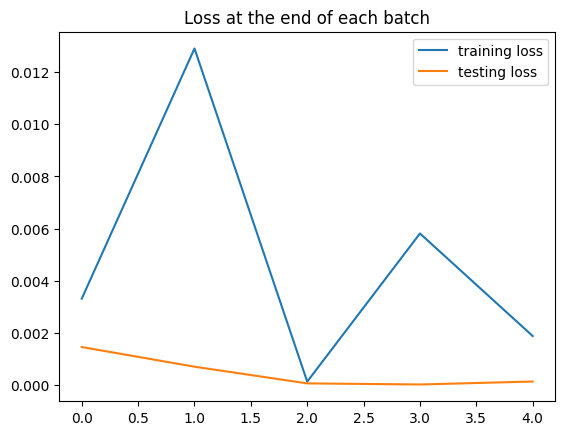

In [ ]:
train_lossest =[t1.item() for t1 in train_losses]
test_lossest = [t2.item() for t2 in test_losses] # Detach test losses as well
plt.plot(train_lossest,label='training loss') #plot train_losset instead of train_losses
plt.plot(test_lossest,label='testing loss') #plot test_losset instead of test_losses
plt.title('Loss at the end of each batch')
plt.legend()

In [ ]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0
  for b,(x_test,y_test) in enumerate(test_load_everything):
    y_val = model(x_test)
    predicted = torch.max(y_val.data,1)[1]
    correct += (predicted == y_test).sum()
print(f'Test Accuracy: {correct.item()/len(test_data)*100}')

Test Accuracy: 98.57000000000001


In [ ]:
correct.item()

9857